<a href="https://colab.research.google.com/github/dcabarcase/Vision-Artificial/blob/main/Rotaci%C3%B3nyBordes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import cv2 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import urllib.request
import numpy as np
from PIL import Image 
import urllib.request
#import img2pdf
import tempfile

In [68]:
#IMAGE_URL = 'https://github.com/dcabarcase/Vision-Artificial/blob/main/imagen_2023-04-25_171024705.png?raw=true' 
#IMAGE_URL = 'https://github.com/dcabarcase/Vision-Artificial/blob/main/imagen_2023-05-01_133438215.png?raw=true' 2
#IMAGE_URL = 'https://github.com/dcabarcase/Vision-Artificial/blob/main/imagen_2023-05-01_134941644.png?raw=true' 3
IMAGE_URL = 'https://github.com/dcabarcase/Vision-Artificial/blob/main/imagen_2023-05-01_135856559.png?raw=true' #4
im = io.imread(IMAGE_URL) 
def filtrado_inicial(im):
    imgray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) #Poner la imagen en escala de grises
    imfil = cv2.GaussianBlur(imgray, (5,5), 0) #filtro Gaussiano para suavizar la imagen y reducir el ruido 
    return imfil

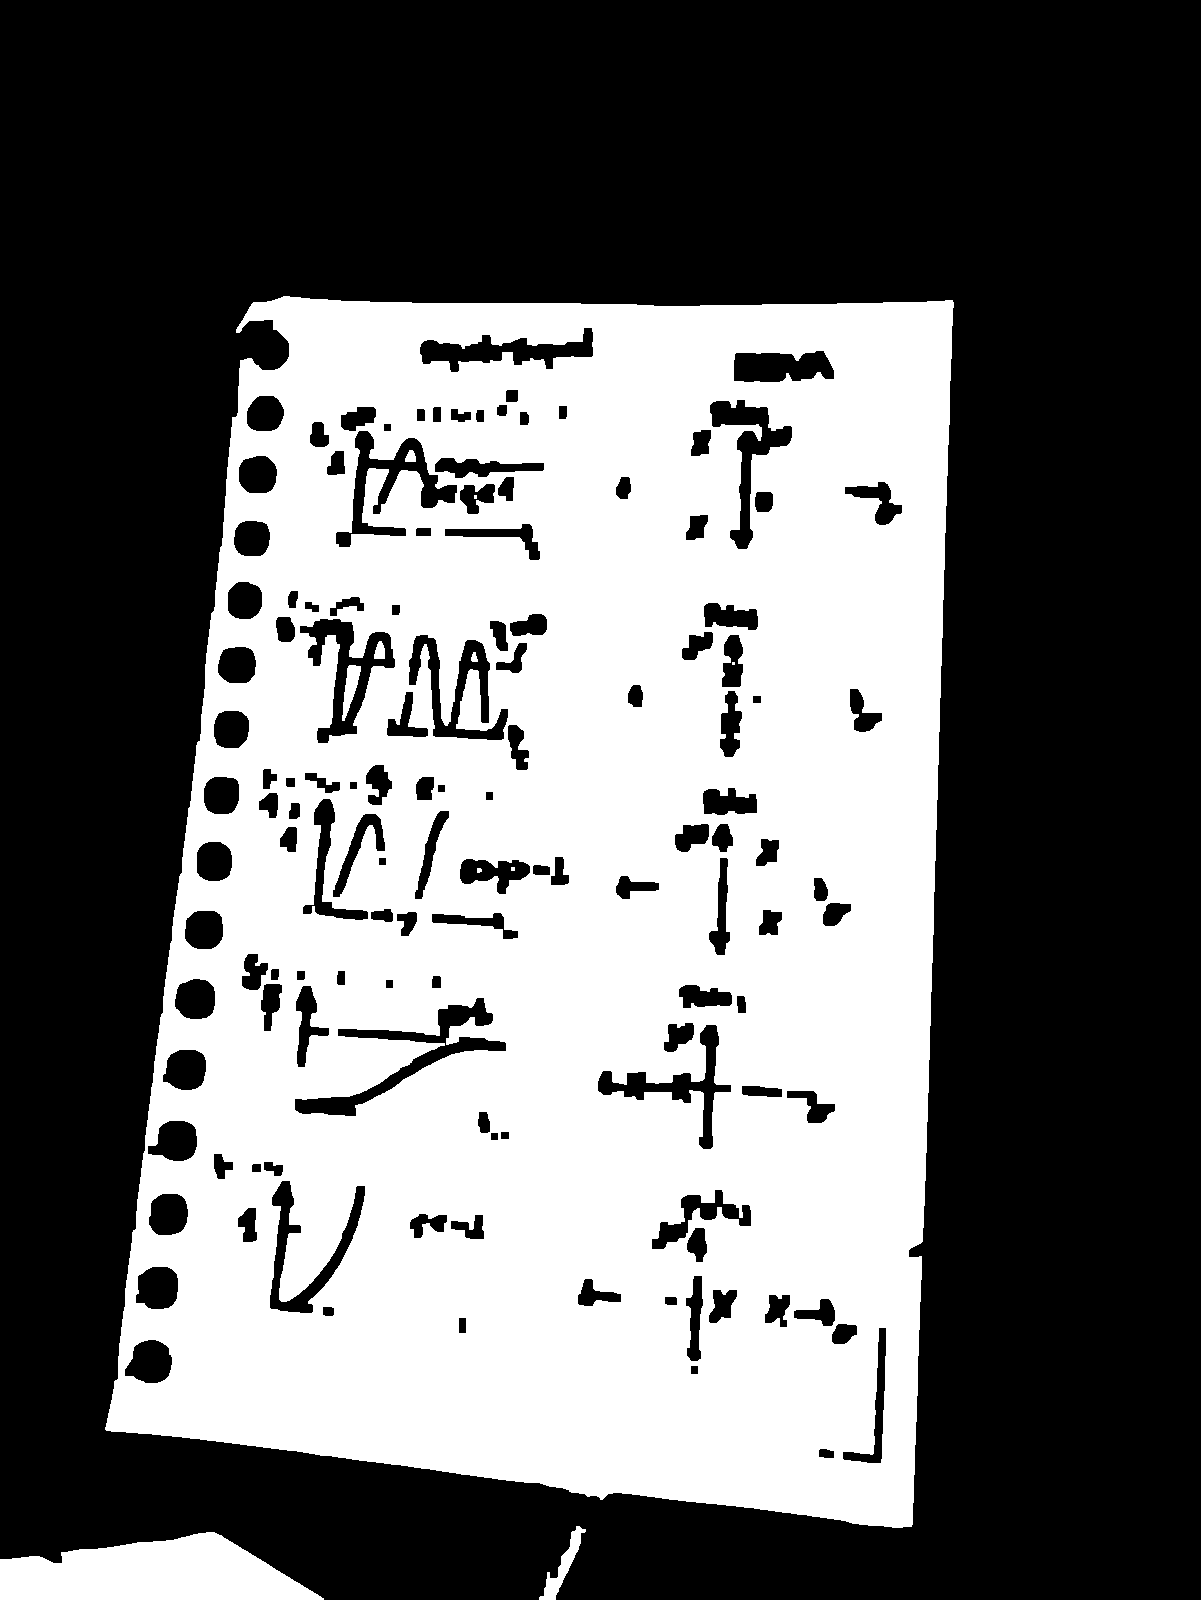

In [69]:
imfil=filtrado_inicial(im)
(T, threshImg) = cv2.threshold(imfil, 0, 255, cv2.THRESH_BINARY| cv2.THRESH_OTSU) #Metodo de OTSU
imumbral = threshImg.copy()
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(imumbral,kernel,iterations = 4)
dilation = cv2.dilate(erosion,kernel,iterations = 1)   
cv2_imshow(dilation)

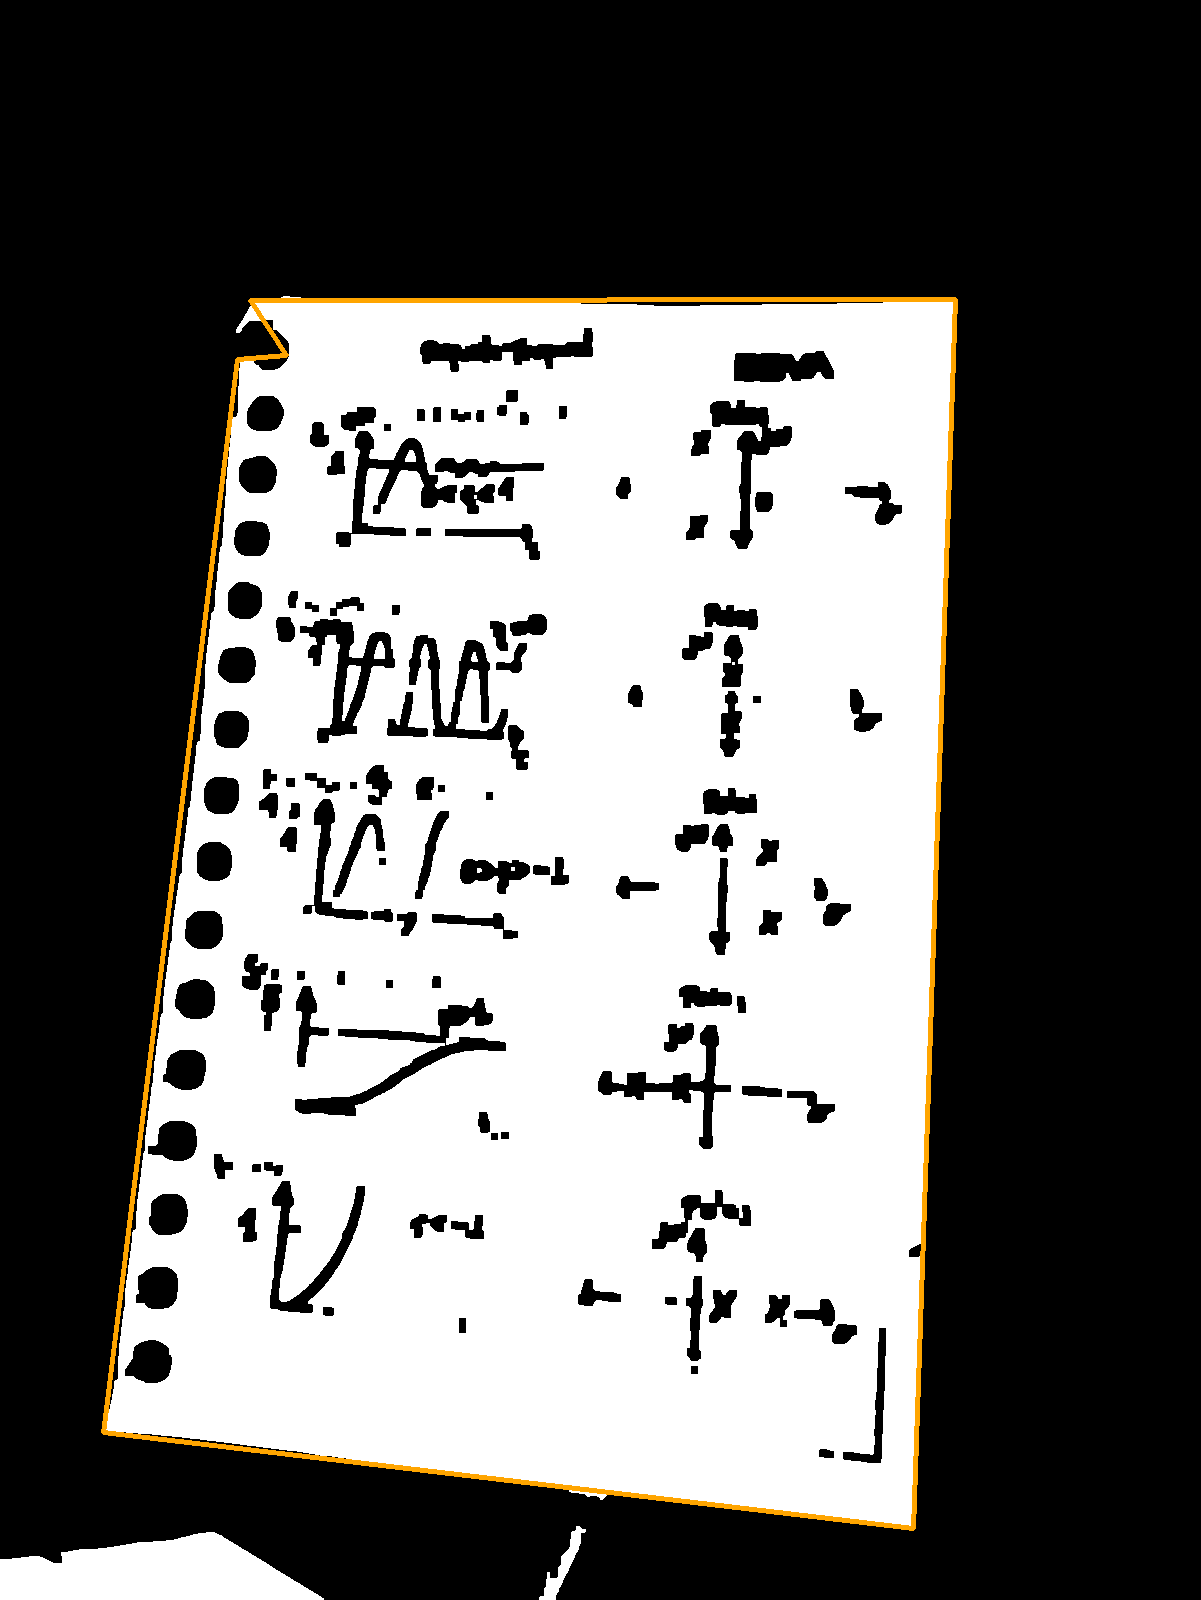

In [70]:
img = cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB)
canny = cv2.Canny(img, 50, 200)
# Aplicar dilatación para cerrar huecos en los bordes
kernel = np.ones((5,5), np.uint8)
dilationx = cv2.dilate(canny, kernel, iterations=1)
# Encontrar contornos de la imagen
contours, hierarchy = cv2.findContours(dilationx, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Ordenar contornos por área y seleccionar el mayor
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:1]
# Aproximar contorno seleccionado a un polígono con 4 esquinas
approx = cv2.approxPolyDP(contours[0], 0.01 * cv2.arcLength(contours[0], True), True)
# Dibujar polígono en la imagen original
cv2.drawContours(img, [approx], -1, (0,165,255), 3)
cv2_imshow(img)

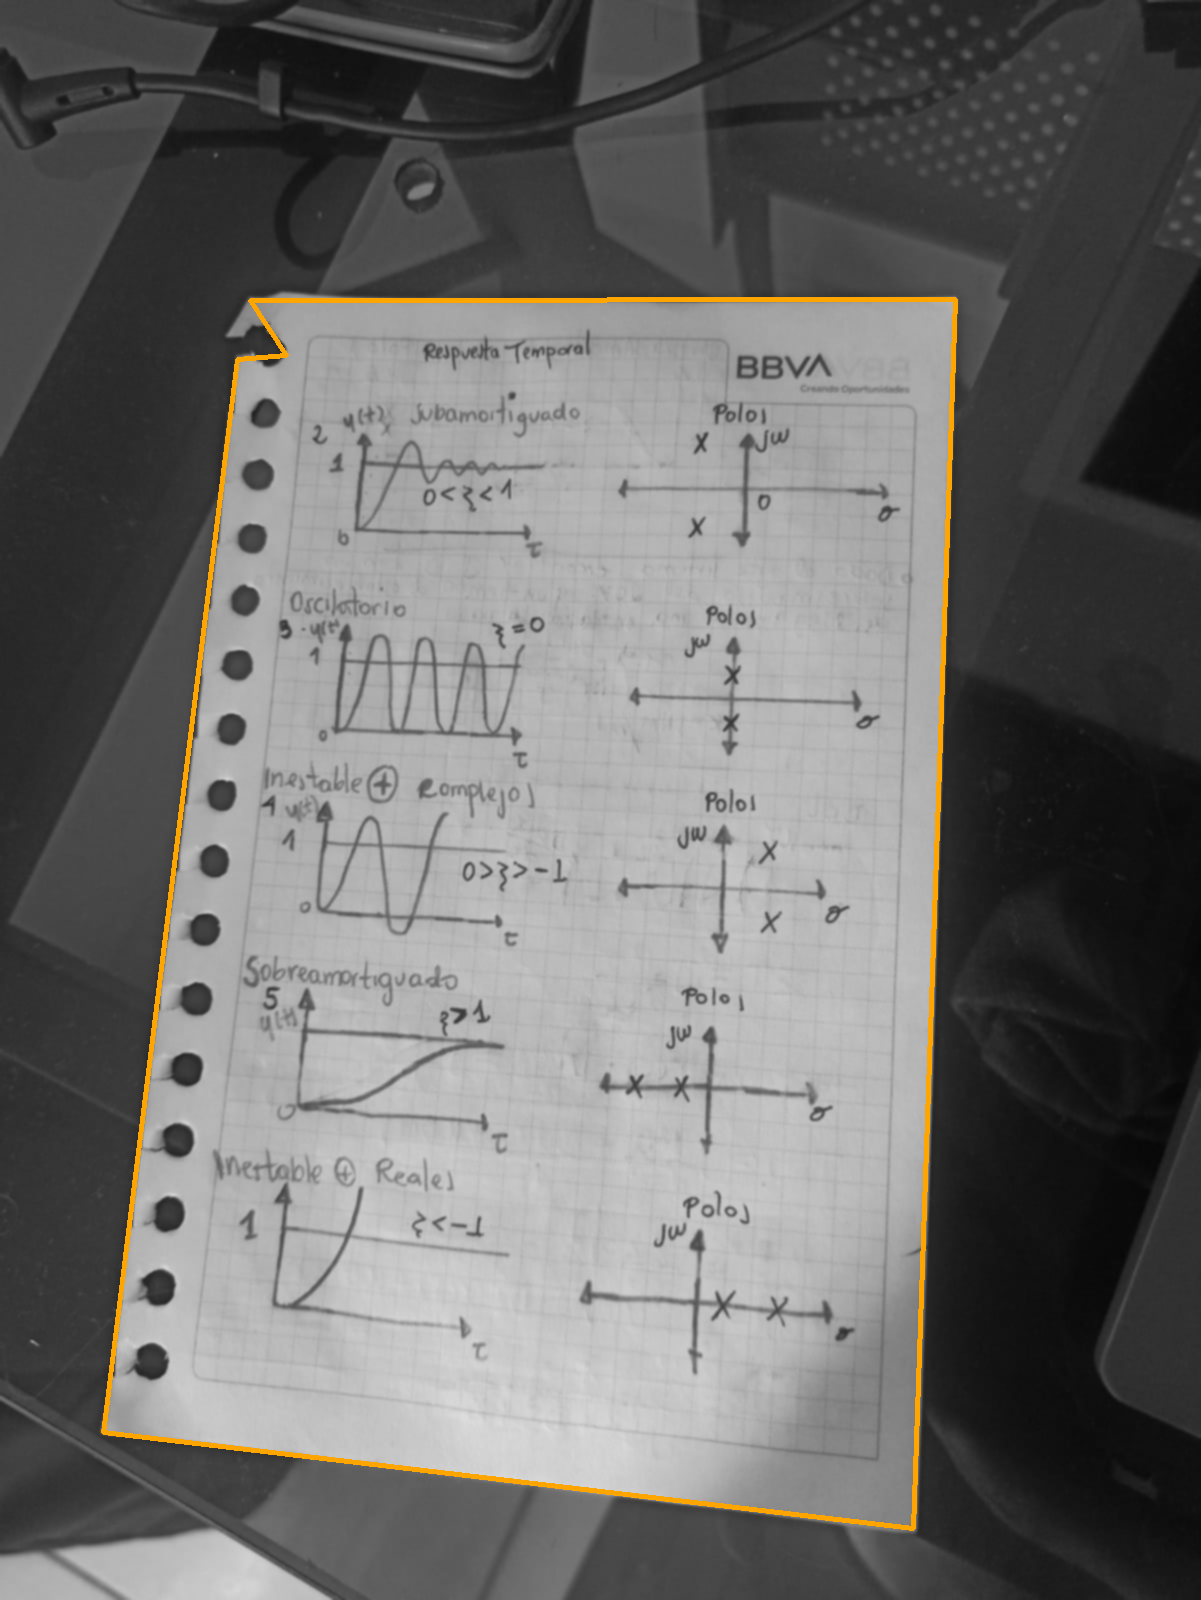

In [71]:
color = cv2.cvtColor(imfil, cv2.COLOR_BGR2RGB)
cv2.drawContours(color, [approx], -1, (0,165,255), 3)
cv2_imshow(color)

Coordenadas de las esquinas:
(250, 300)
(103, 1432)
(913, 1528)
(955, 299)


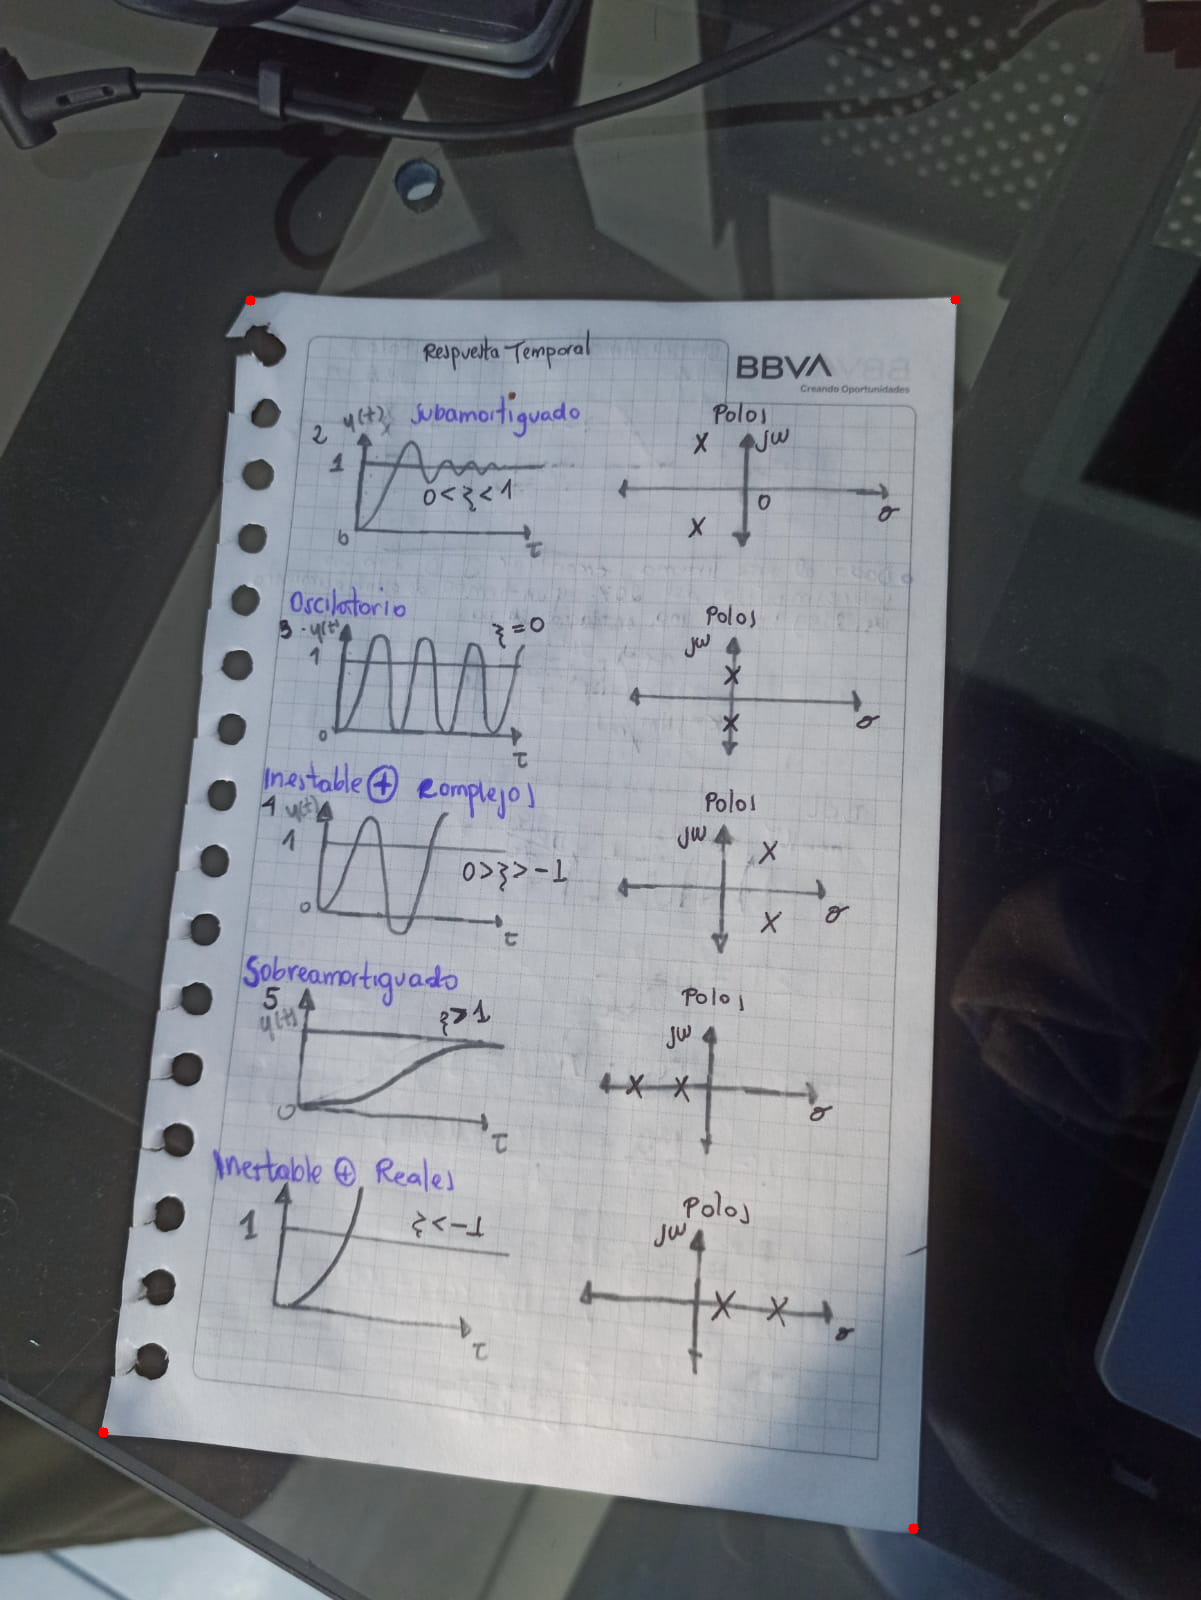

In [72]:
epsilon = 0.02 * cv2.arcLength(contours[0], True)
approx = cv2.approxPolyDP(contours[0], epsilon, True)
# Obtener coordenadas de las esquinas
corner_coords = []
for corner in approx:
    x, y = corner[0]
    corner_coords.append((x, y))
# Imprimir coordenadas de las esquinas
print("Coordenadas de las esquinas:")
for corner in corner_coords:
    print(corner)
# Dibujar contorno y esquinas sobre la imagen
#cv2.drawContours(im, [approx], -1, (0,165,255), 3)
for corner in corner_coords:
    cv2.circle(im, corner, 5, (0, 0, 255), -1)
# Mostrar imagen con contorno y esquinas
cv2_imshow(im)

In [73]:
corner_coords.sort()
top_left = corner_coords[1]
bottom_left = corner_coords[0]
bottom_right = corner_coords[3]
top_right = corner_coords[2]
# Imprimir coordenadas de las esquinas
print("Coordenadas de las esquinas (Ancho, Alto):")
print("Top Left:", top_left)
print("Top Right:", top_right)
print("Bottom Left:", bottom_left)
print("Bottom Right:", bottom_right)

Coordenadas de las esquinas (Ancho, Alto):
Top Left: (250, 300)
Top Right: (913, 1528)
Bottom Left: (103, 1432)
Bottom Right: (955, 299)


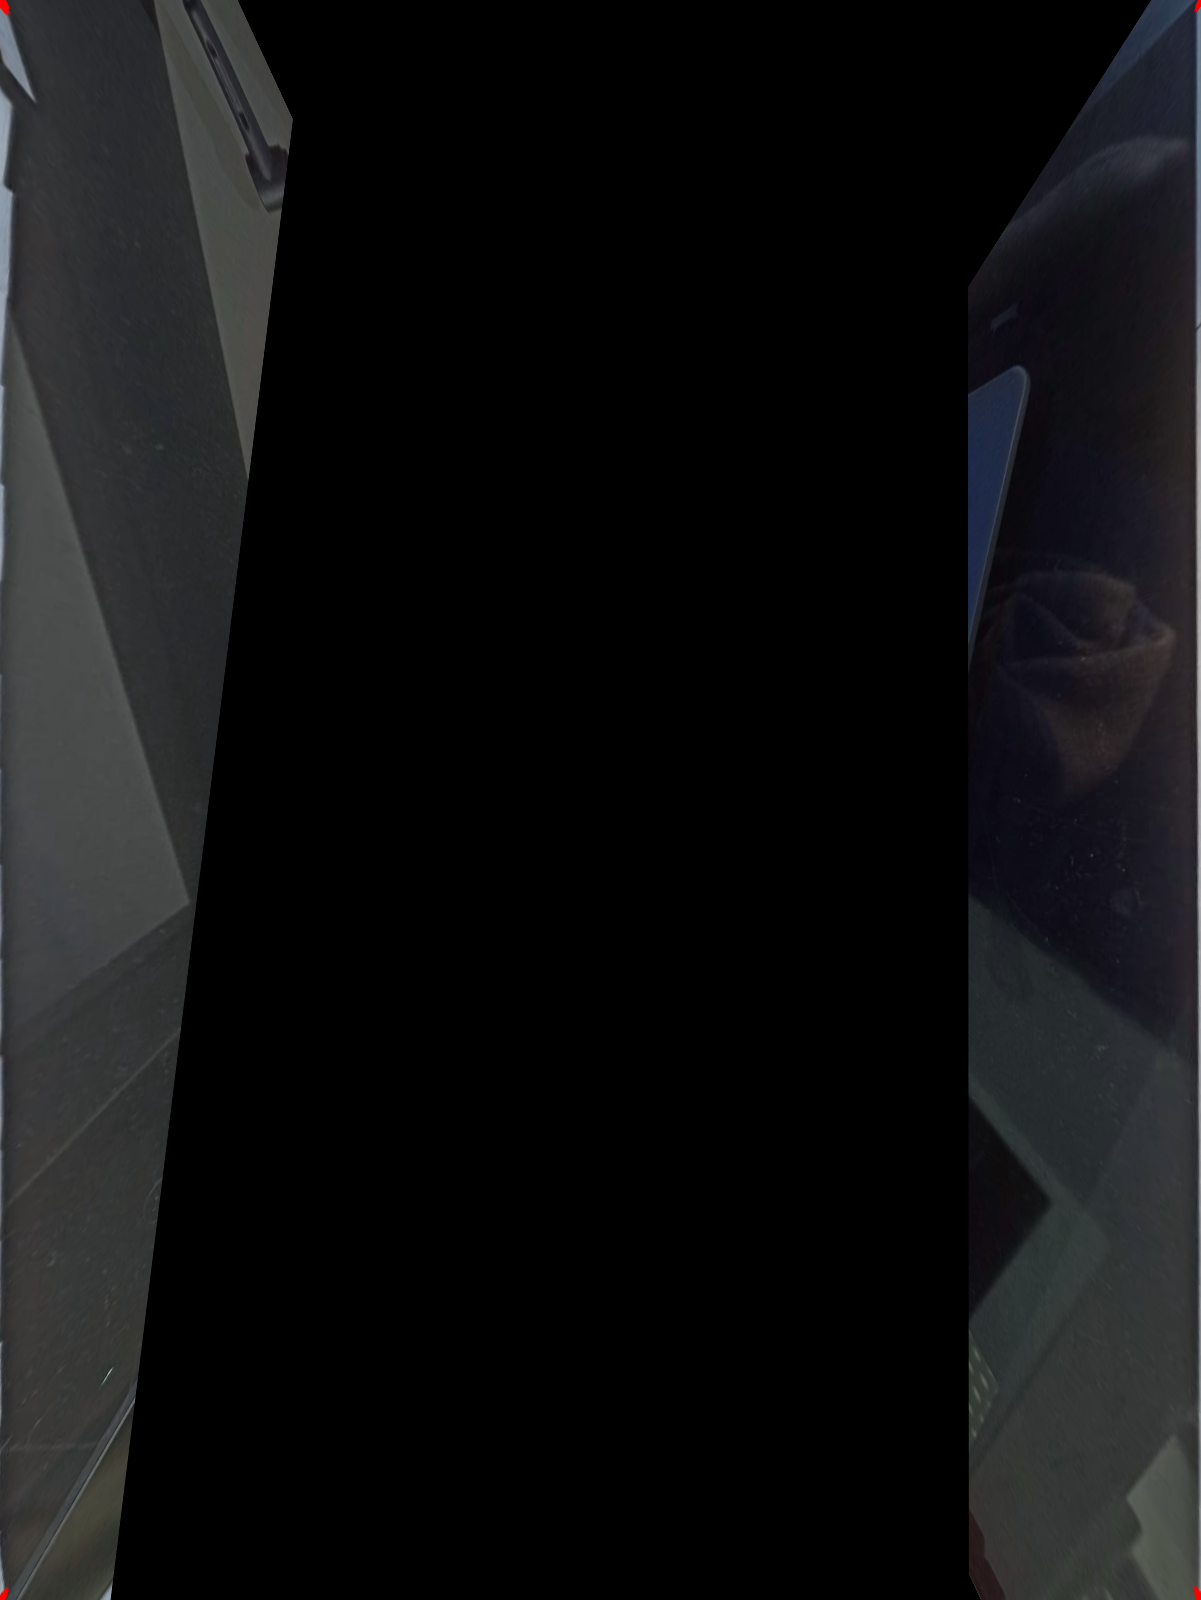

In [84]:
import cv2
import numpy as np
# Definir las esquinas de la ROI
src = np.float32([[top_left], [top_right], [bottom_left], [bottom_right]])
# Definir las coordenadas de la perspectiva recta
dst = np.float32([[0, 0], [im.shape[1], 0], [0, im.shape[0]], [im.shape[1], im.shape[0]]])
# Calcular la matriz de transformación
M = cv2.getPerspectiveTransform(src, dst)
# Aplicar la transformación a la imagen
output = cv2.warpPerspective(im, M, (im.shape[1], im.shape[0]), flags=cv2.INTER_LINEAR)
# Mostrar la imagen de salida
cv2_imshow(output)
